## Visualizing Data For Classification

### Load and prepare data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.random as nr
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
path = r'C:\Users\usuario1\Principles-of-Machine-Learning-Python\Module2'
file = r'\German_Credit.csv'
credit = pd.read_csv(path+file, header=None)
credit.columns = ['customer_id',
                  'checking_account_status', 'loan_duration_mo', 'credit_history', 
                  'purpose', 'loan_amount', 'savings_account_balance', 
                  'time_employed_yrs', 'payment_pcnt_income','gender_status', 
                  'other_signators', 'time_in_residence', 'property', 'age_yrs',
                  'other_credit_outstanding', 'home_ownership', 'number_loans', 
                  'job_category', 'dependents', 'telephone', 'foreign_worker', 
                  'bad_credit']
print(credit.shape)
credit.head()

(1012, 22)


,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
#Customer ID not relevant for classification
credit.drop(['customer_id'], axis=1, inplace=True)
print(credit.shape)
credit.head()

(1012, 21)


,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [11]:
code_list = [['checking_account_status', 
              {'A11' : '< 0 DM', 
               'A12' : '0 - 200 DM', 
               'A13' : '> 200 DM or salary assignment', 
               'A14' : 'none'}],
            ['credit_history',
            {'A30' : 'no credit - paid', 
             'A31' : 'all loans at bank paid', 
             'A32' : 'current loans paid', 
             'A33' : 'past payment delays', 
             'A34' : 'critical account - other non-bank loans'}],
            ['purpose',
            {'A40' : 'car (new)', 
             'A41' : 'car (used)',
             'A42' : 'furniture/equipment',
             'A43' : 'radio/television', 
             'A44' : 'domestic appliances', 
             'A45' : 'repairs', 
             'A46' : 'education', 
             'A47' : 'vacation',
             'A48' : 'retraining',
             'A49' : 'business', 
             'A410' : 'other' }],
            ['savings_account_balance',
            {'A61' : '< 100 DM', 
             'A62' : '100 - 500 DM', 
             'A63' : '500 - 1000 DM', 
             'A64' : '>= 1000 DM',
             'A65' : 'unknown/none' }],
            ['time_employed_yrs',
            {'A71' : 'unemployed',
             'A72' : '< 1 year', 
             'A73' : '1 - 4 years', 
             'A74' : '4 - 7 years', 
             'A75' : '>= 7 years'}],
            ['gender_status',
            {'A91' : 'male-divorced/separated', 
             'A92' : 'female-divorced/separated/married',
             'A93' : 'male-single', 
             'A94' : 'male-married/widowed', 
             'A95' : 'female-single'}],
            ['other_signators',
            {'A101' : 'none', 
             'A102' : 'co-applicant', 
             'A103' : 'guarantor'}],
            ['property',
            {'A121' : 'real estate',
             'A122' : 'building society savings/life insurance', 
             'A123' : 'car or other',
             'A124' : 'unknown-none' }],
            ['other_credit_outstanding',
            {'A141' : 'bank', 
             'A142' : 'stores', 
             'A143' : 'none'}],
             ['home_ownership',
            {'A151' : 'rent', 
             'A152' : 'own', 
             'A153' : 'for free'}],
            ['job_category',
            {'A171' : 'unemployed-unskilled-non-resident', 
             'A172' : 'unskilled-resident', 
             'A173' : 'skilled',
             'A174' : 'highly skilled'}],
            ['telephone', 
            {'A191' : 'none', 
             'A192' : 'yes'}],
            ['foreign_worker',
            {'A201' : 'yes', 
             'A202' : 'no'}],
            ['bad_credit',
            {2 : 1,
             1 : 0}]]

for col_dic in code_list:
    credit[col_dic[0]] = [col_dic[1][x] for x in credit[col_dic[0]]]

In [12]:
credit.head()

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,...,real estate,22,none,own,1,skilled,1,none,yes,1
2,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,none,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
3,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
4,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,none,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1


### Examine classes and class imbalance

In [13]:
credit.bad_credit.value_counts()

0    710
1    302
Name: bad_credit, dtype: int64

### Visualize class separation by numeric features

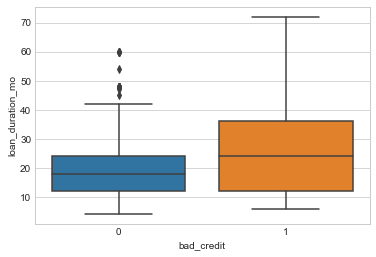

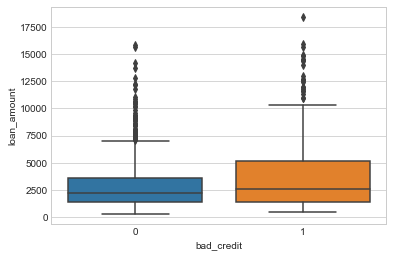

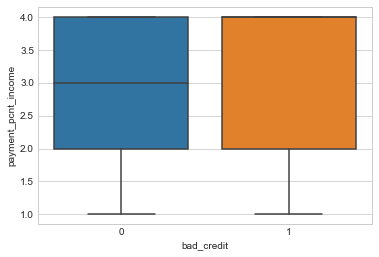

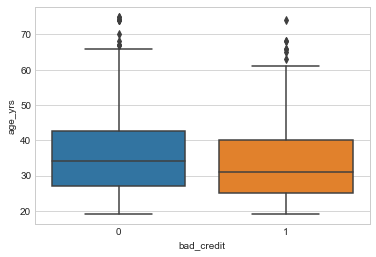

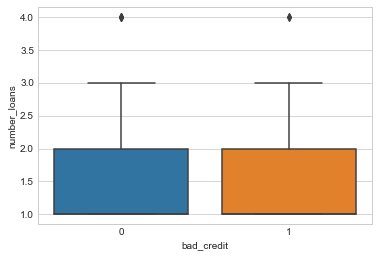

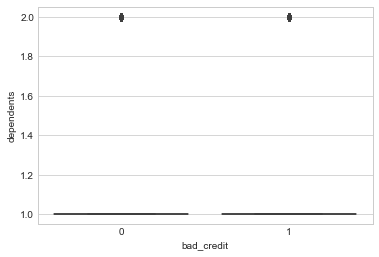

In [14]:
def plot_box(credit, cols, col_x = 'bad_credit'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(col_x, col, data=credit)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()

num_cols = ['loan_duration_mo', 'loan_amount', 'payment_pcnt_income',
            'age_yrs', 'number_loans', 'dependents']
plot_box(credit, num_cols)

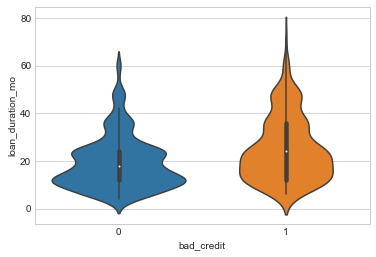

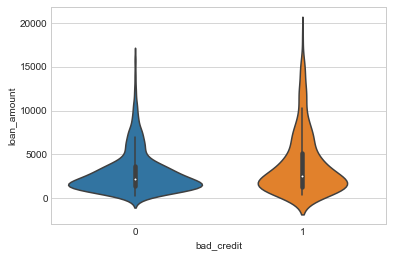

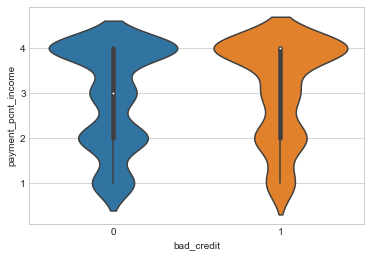

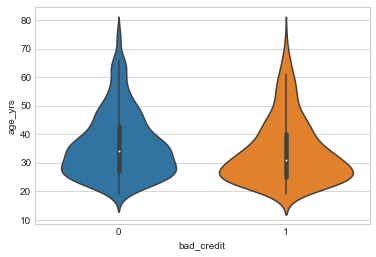

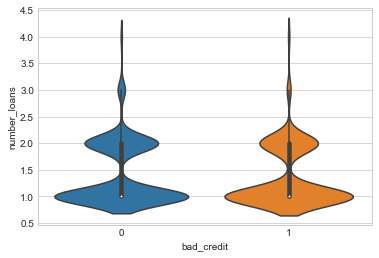

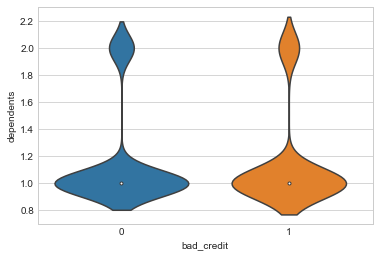

In [15]:
def plot_violin(credit, cols, col_x = 'bad_credit'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.violinplot(col_x, col, data=credit)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()

plot_violin(credit, num_cols)

### Visualize class separation by categorical features

In [19]:
cat_cols = ['checking_account_status', 'credit_history', 'purpose', 'savings_account_balance', 
                  'time_employed_yrs', 'gender_status', 'other_signators', 'property', 
                  'other_credit_outstanding', 'home_ownership', 'job_category', 'telephone', 
                  'foreign_worker']

credit['dummy'] = 1

checking_account_status


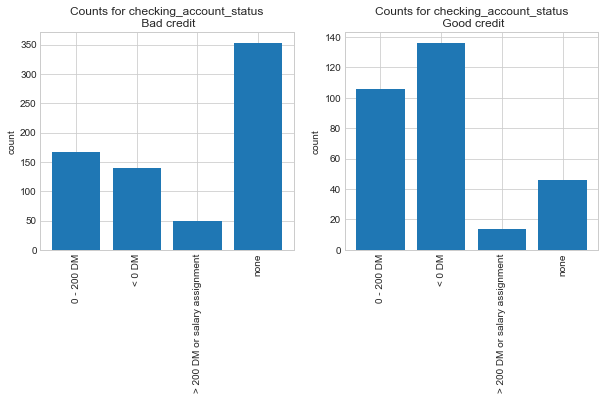

credit_history


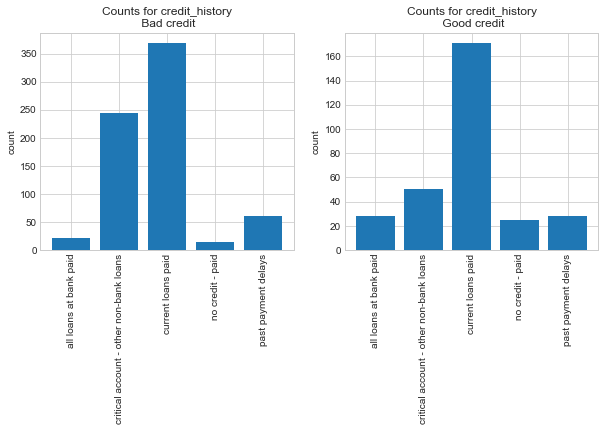

purpose


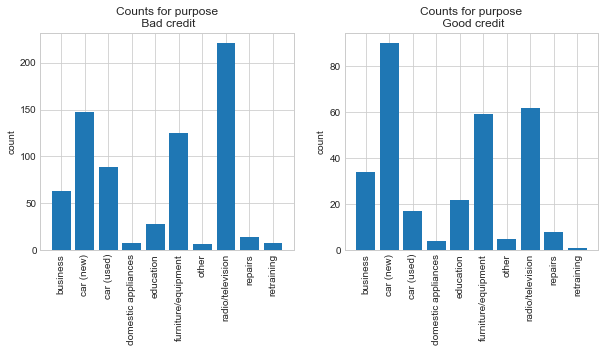

savings_account_balance


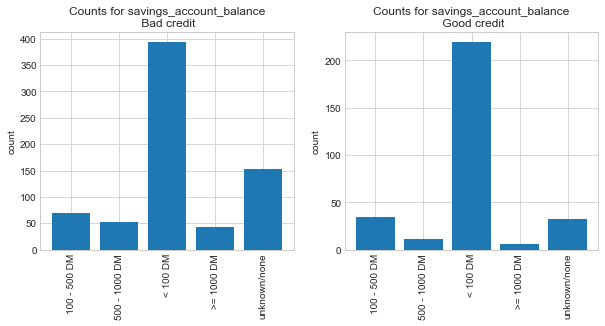

time_employed_yrs


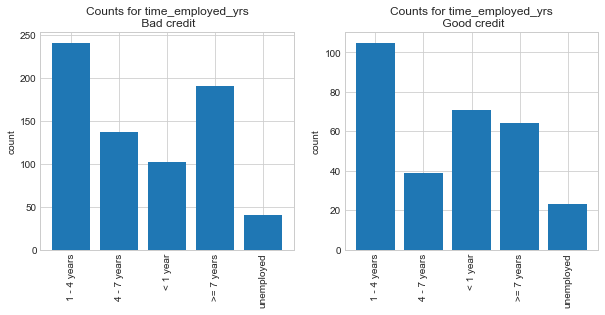

gender_status


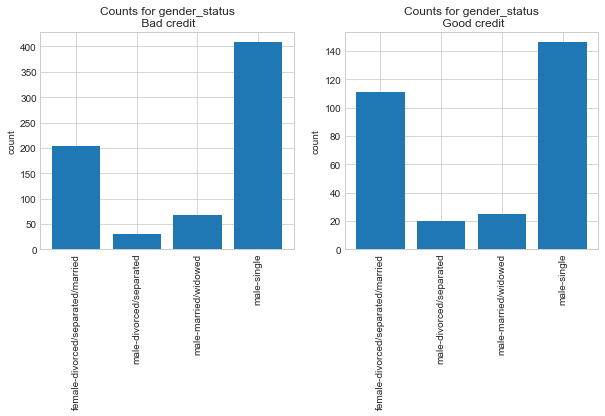

other_signators


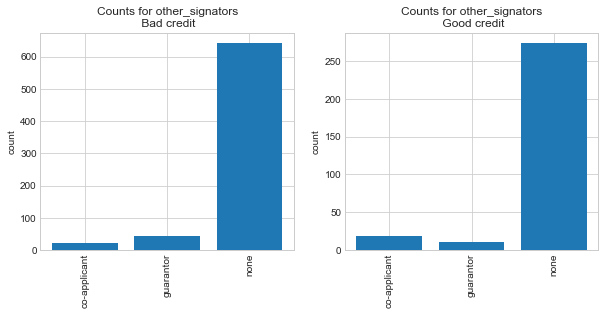

property


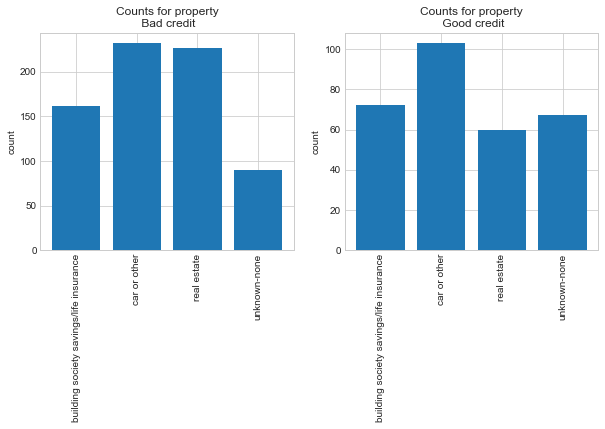

other_credit_outstanding


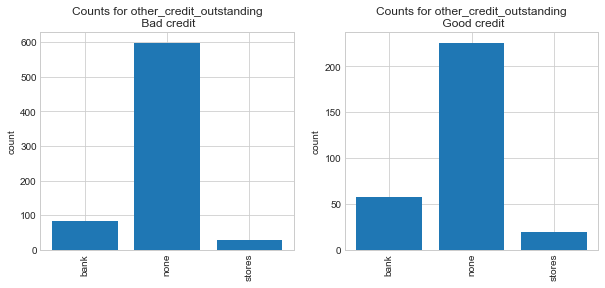

home_ownership


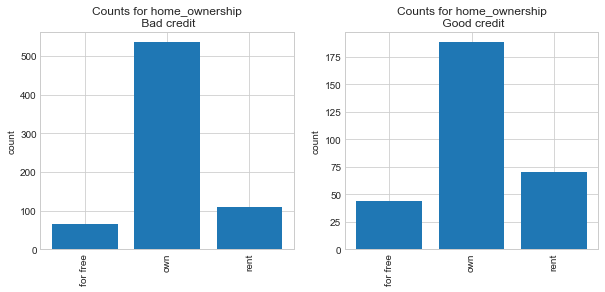

job_category


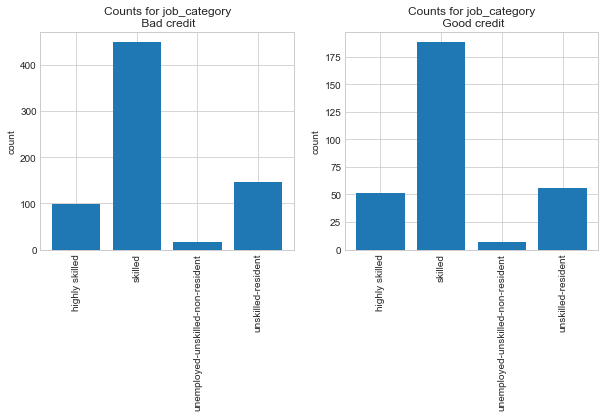

telephone


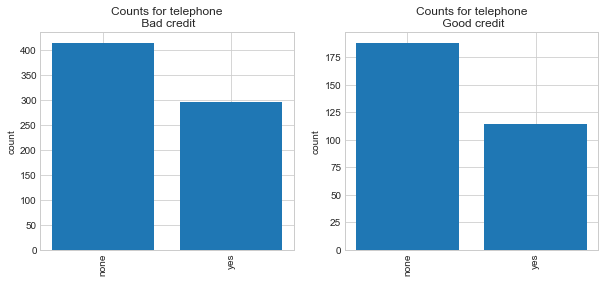

foreign_worker


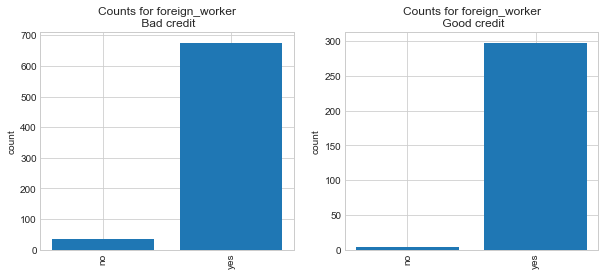

In [22]:
for col in cat_cols:
    print(col)
    counts = credit[['dummy', 'bad_credit', col]].groupby(['bad_credit', col], as_index = False).count()
    temp = counts[counts['bad_credit']==0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bad credit')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    temp = counts[counts['bad_credit']==1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Good credit')
    plt.ylabel('count')
    plt.show()    

## Visualizing Data For Regression

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading and exploring the data

In [28]:
path = r'C:\Users\usuario1\Principles-of-Machine-Learning-Python\Module2'
file = r'\Automobile price data _Raw_.csv'

auto_prices = pd.read_csv(path+file)

def clean_auto_data(auto_prices):
    cols = auto_prices.columns
    auto_prices.columns = [str.replace('-', '_') for str in cols]
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak_rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis=0, inplace=True)
    
    for column in cols: 
        auto_prices[column] = pd.to_numeric(auto_prices[column])
    return auto_prices

auto_prices = clean_auto_data(auto_prices)

print(auto_prices.columns)

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [29]:
auto_prices.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [30]:
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [31]:
auto_prices.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [32]:
auto_prices.nunique()

symboling              6
normalized_losses     52
make                  21
fuel_type              2
aspiration             2
num_of_doors           3
body_style             5
drive_wheels           3
engine_location        2
wheel_base            50
length                71
width                 41
height                46
curb_weight          166
engine_type            5
num_of_cylinders       6
engine_size           40
fuel_system            7
bore                  38
stroke                36
compression_ratio     32
horsepower            57
peak_rpm              22
city_mpg              29
highway_mpg           30
price                180
dtype: int64

In [33]:
def count_unique(auto_prices, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(auto_prices[col].value_counts())

cat_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 
            'fuel_system']
count_unique(auto_prices, cat_cols)


For column make
toyota           32
nissan           18
honda            13
mitsubishi       13
mazda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

For column fuel_type
gas       175
diesel     20
Name: fuel_type, dtype: int64

For column aspiration
std      159
turbo     36
Name: aspiration, dtype: int64

For column num_of_doors
four    112
two      81
?         2
Name: num_of_doors, dtype: int64

For column body_style
sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

For column drive_wheels
fwd    116
rwd     71
4wd      8
Name: drive_wheels, dtype: int64

For column engine_location
front    192
rear    

### Visualizing Automobile Data for Regression

#### Distribution

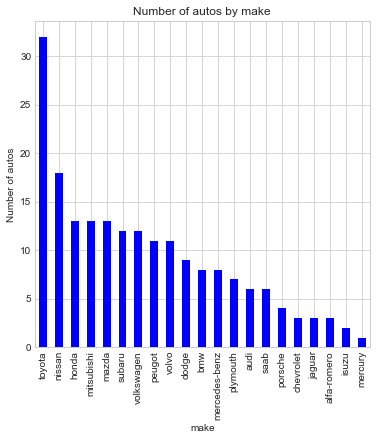

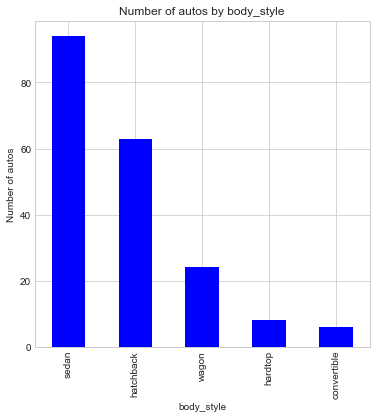

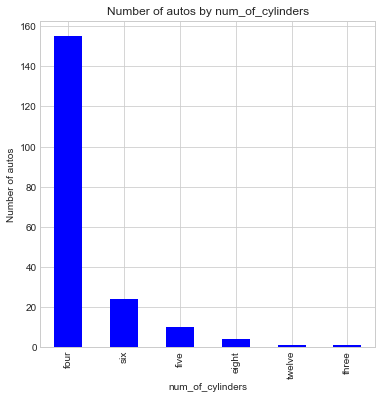

In [35]:
#Bar Charts
def plot_bars(auto_prices, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        counts = auto_prices[col].value_counts()
        counts.plot.bar(ax = ax, color = 'blue')
        ax.set_title('Number of autos by ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of autos')
        plt.show()

plot_cols = ['make', 'body_style', 'num_of_cylinders']
plot_bars(auto_prices, plot_cols)

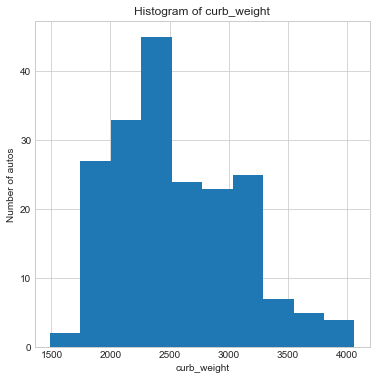

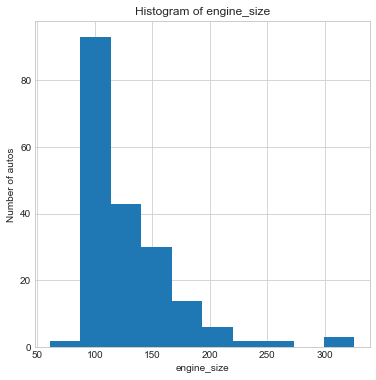

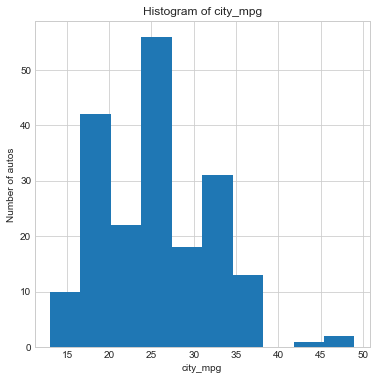

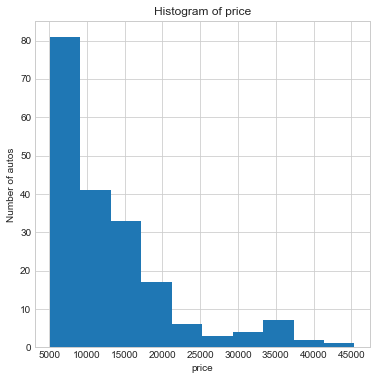

In [36]:
# Histograms
def plot_histogram(auto_prices, cols, bins=10):
        for col in cols:
            fig = plt.figure(figsize=(6,6))
            ax = fig.gca() #Define axis
            auto_prices[col].plot.hist(ax = ax, bins = bins)
            ax.set_title('Histogram of ' + col)
            ax.set_xlabel(col)
            ax.set_ylabel('Number of autos')
            plt.show()

num_cols = ['curb_weight', 'engine_size', 'city_mpg', 'price']    
plot_histogram(auto_prices, num_cols)

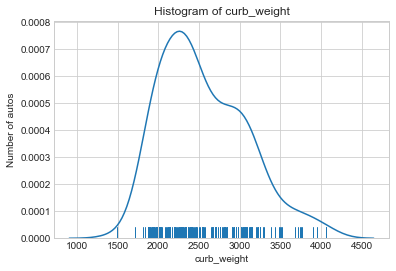

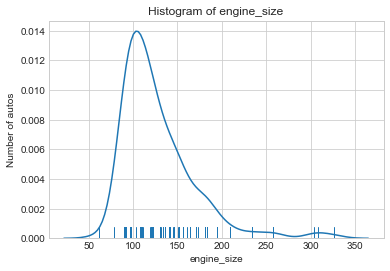

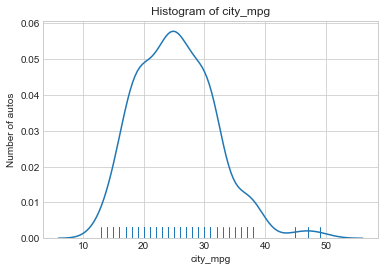

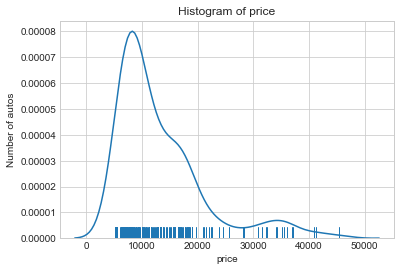

In [37]:
# Kernel Density Estimation

def plot_density_hist(auto_prices, cols, bins=10, hist=False):
    for col in cols:
        sns.set_style('whitegrid')
        sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col)
        plt.xlabel(col)
        plt.ylabel('Number of autos')
        plt.show()

plot_density_hist(auto_prices, num_cols)

C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


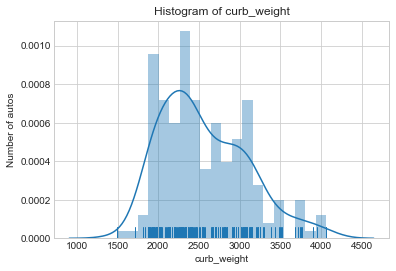

C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


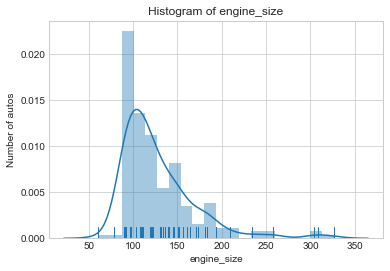

C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


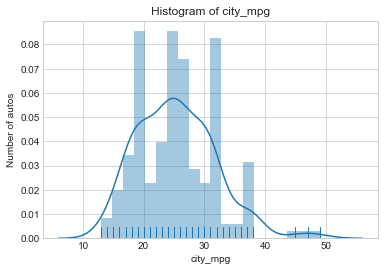

C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


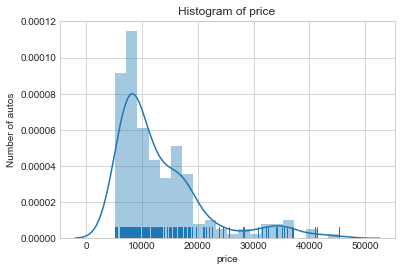

In [38]:
plot_density_hist(auto_prices, num_cols, bins=20, hist=True)

#### Two Dimensional Plots

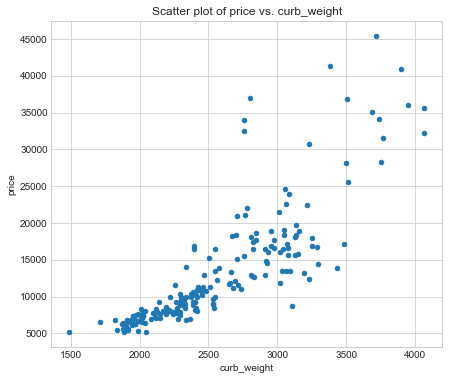

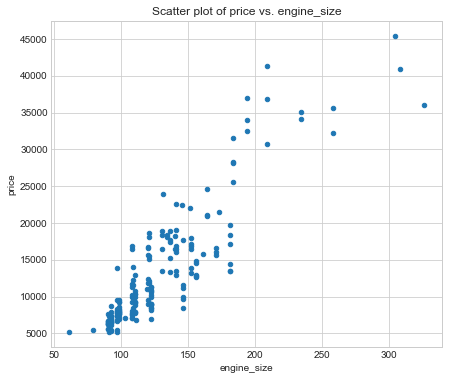

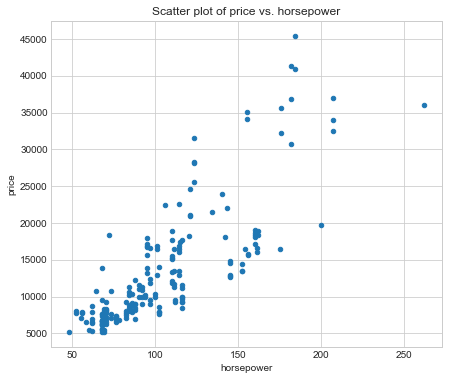

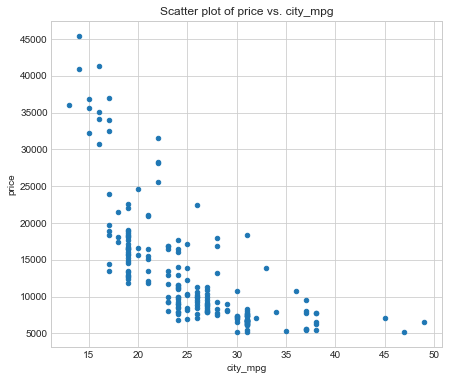

In [39]:
# Scatter plot
def plot_scatter(auto_prices, cols, col_y = 'price'):
    for col in cols:
        fig = plt.figure(figsize=(7,6))
        ax = fig.gca()
        auto_prices.plot.scatter(x=col, y=col_y, ax=ax)
        ax.set_title('Scatter plot of '+col_y+' vs. '+col)
        ax.set_xlabel(col)
        ax.set_ylabel(col_y)
        plt.show()
num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter(auto_prices, num_cols)

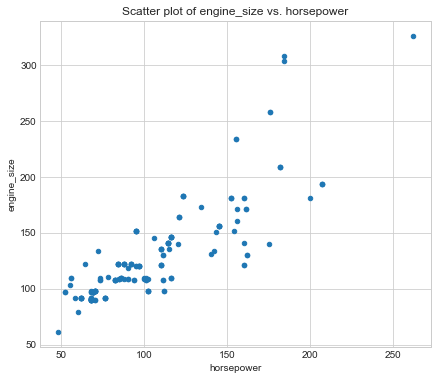

In [40]:
# Horsepower and Engine Size seem colinear
plot_scatter(auto_prices, ['horsepower'], 'engine_size')

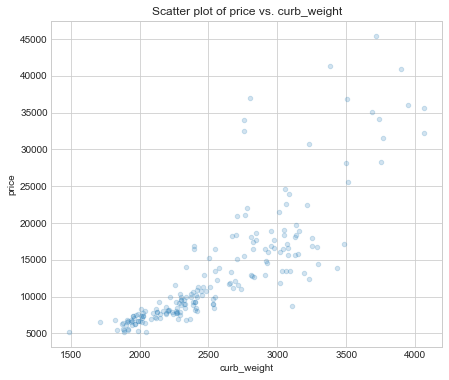

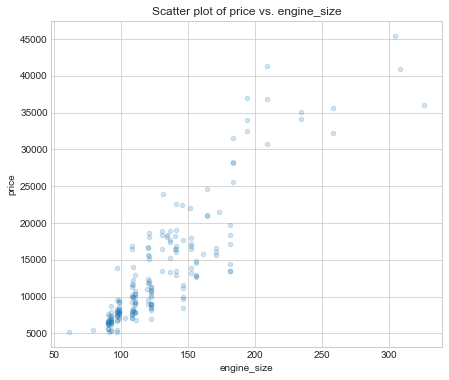

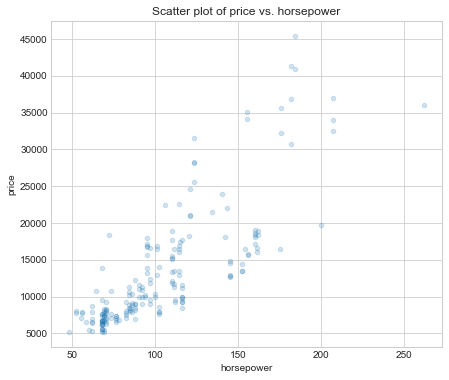

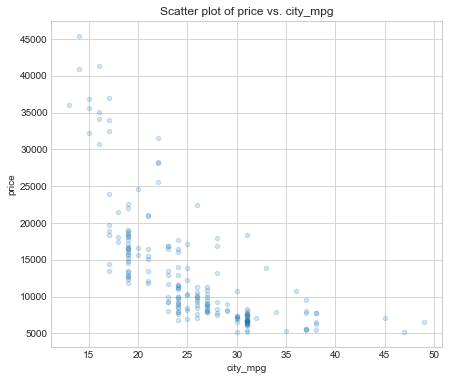

In [42]:
# Overplotting is a problem to interpret the data
def plot_scatter_t(auto_prices, cols, col_y = 'price', alpha=1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6))
        ax = fig.gca()
        auto_prices.plot.scatter(x=col, y=col_y, ax=ax, alpha=alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(auto_prices, num_cols, alpha=0.2)

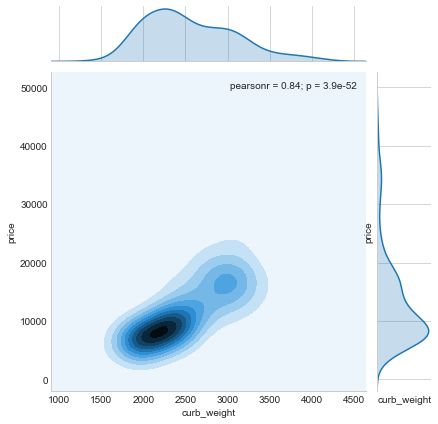

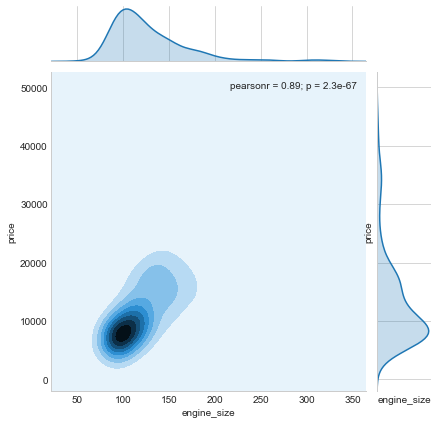

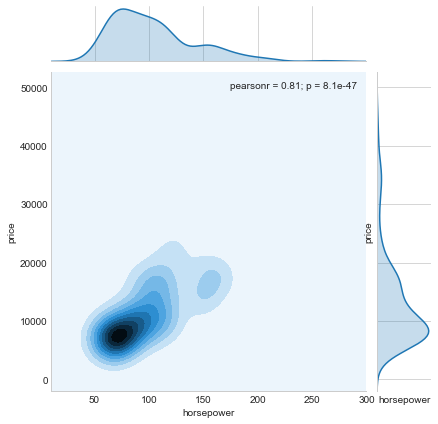

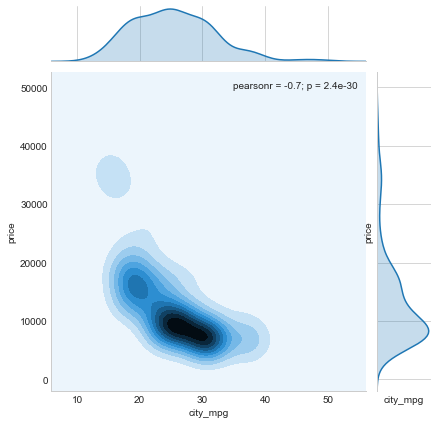

In [44]:
def plot_density_2d(auto_prices, cols, col_y='price', kind='kde'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.jointplot(col,col_y,data=auto_prices, kind=kind)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()

plot_density_2d(auto_prices, num_cols)

C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


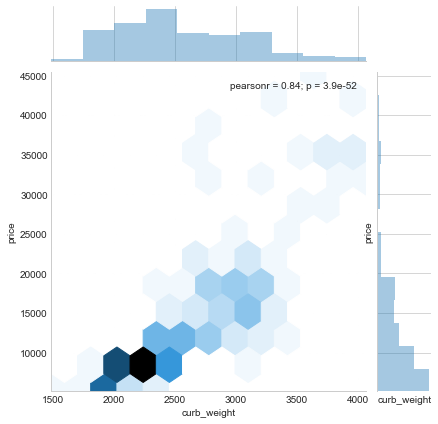

C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


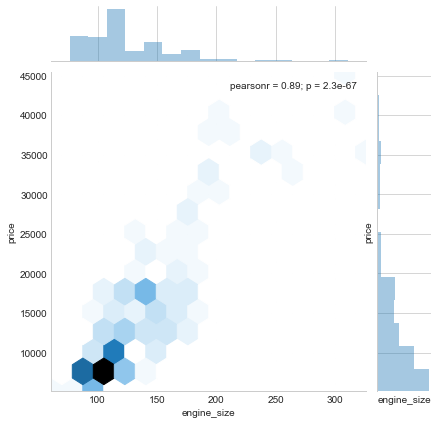

C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


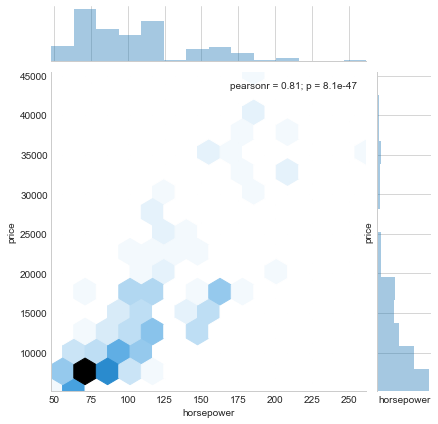

C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\usuario1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


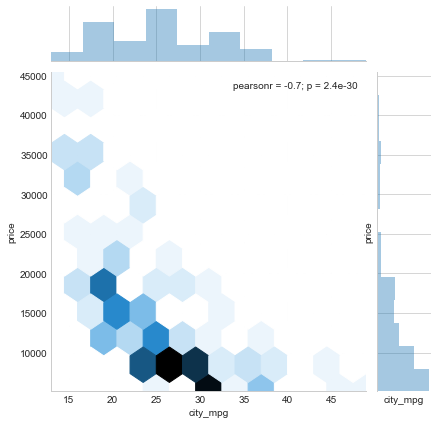

In [45]:
plot_density_2d(auto_prices, num_cols, kind='hex')

#### Aesthetics

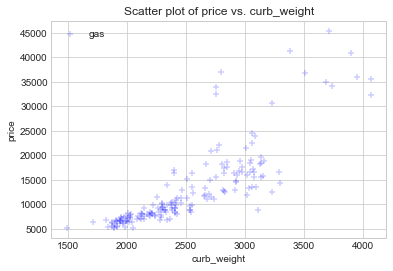

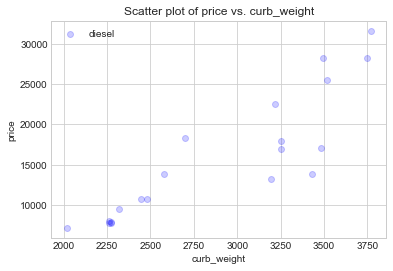

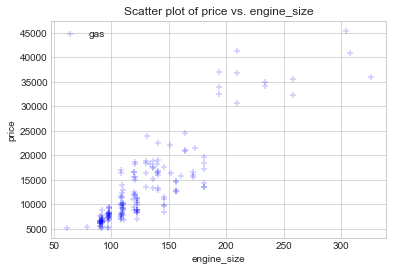

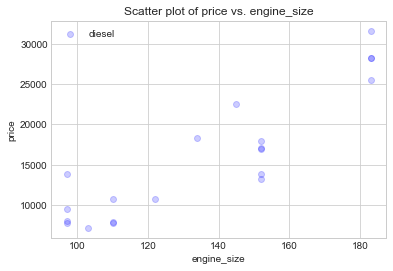

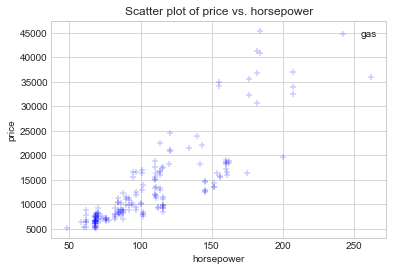

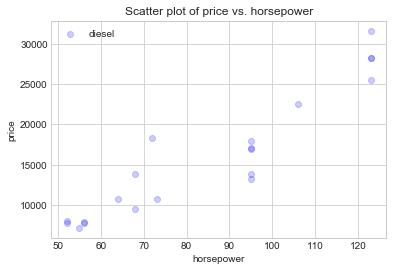

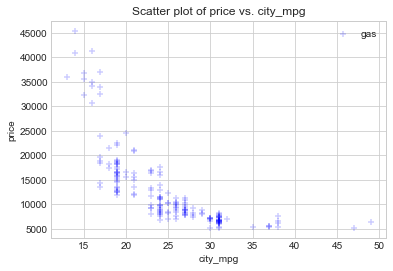

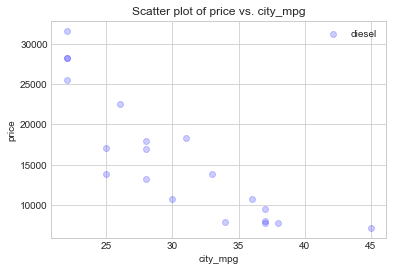

In [48]:
#Marker shape
def plot_scatter_shape(auto_prices, cols, shape_col = 'fuel_type', col_y = 'price', alpha=0.2):
    shapes = ['+', 'o', 's', 'x', '^']
    unique_cats = auto_prices[shape_col].unique()
    for col in cols:
        sns.set_style('whitegrid')
        for i, cat in enumerate(unique_cats):
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                       scatter_kws={'alpha':alpha}, fit_reg=False, color='blue')
            plt.title('Scatter plot of ' + col_y + ' vs. ' + col)
            plt.xlabel(col)
            plt.ylabel(col_y)
            plt.legend()
            plt.show()
    
num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter_shape(auto_prices, num_cols) 

#### Multi-axis view of data

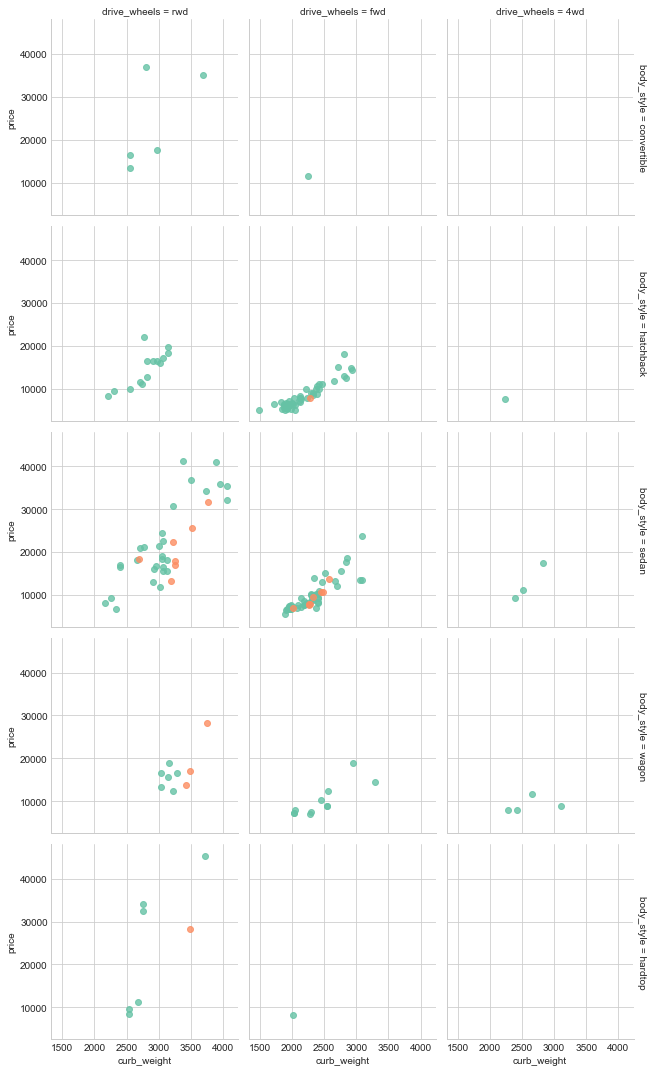

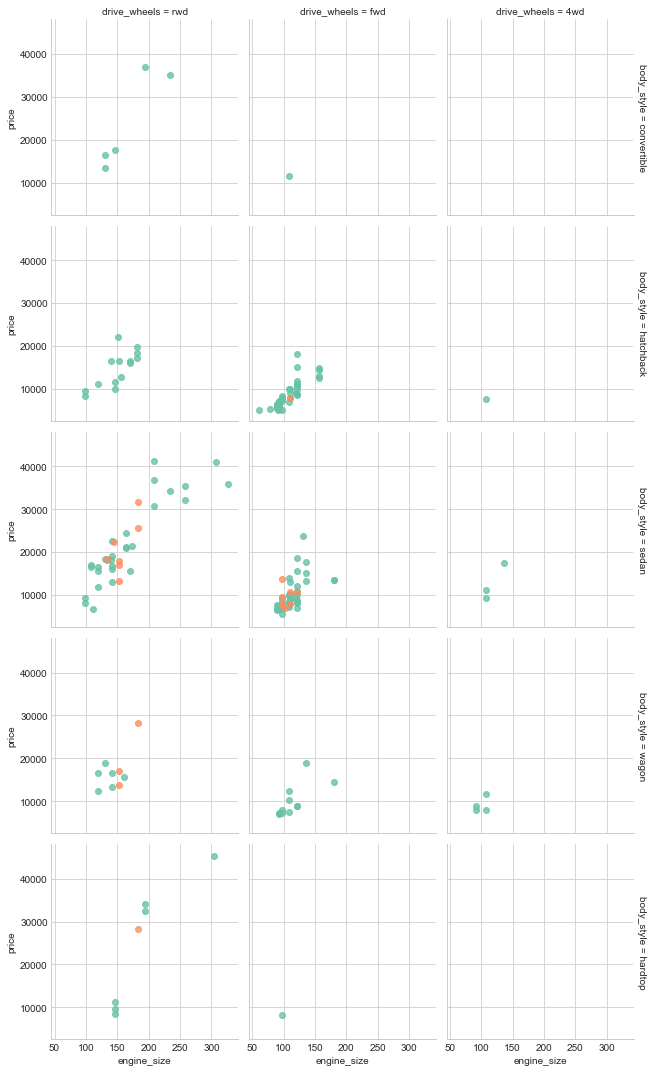

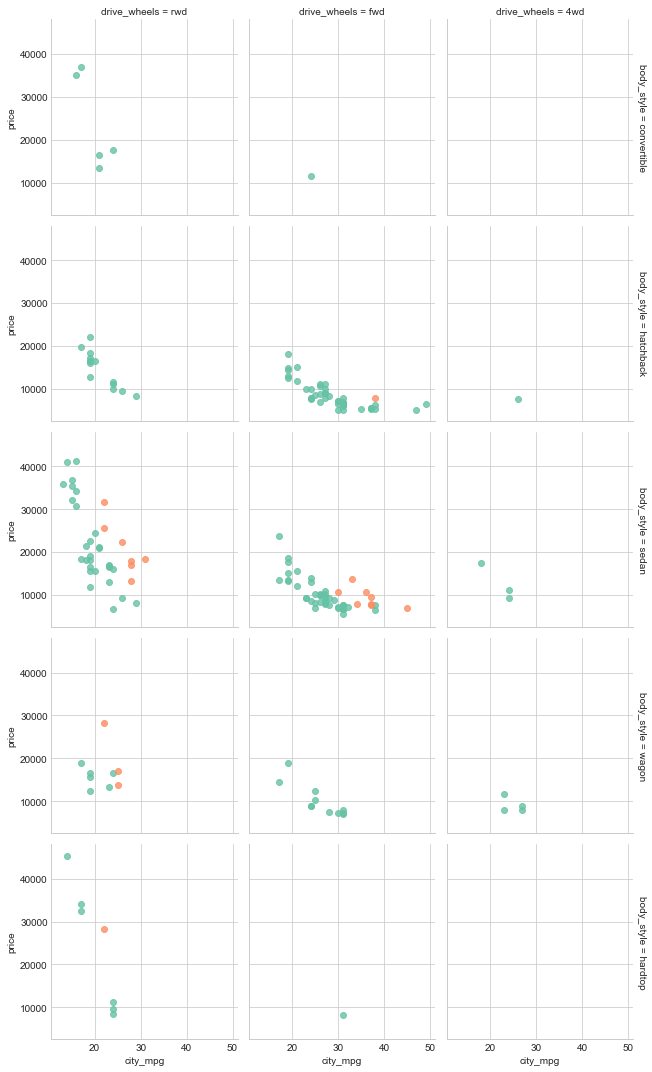

In [51]:
def cond_plot(cols):
    import IPython.html.widgets
    import seaborn as sns
    #hue = color
    for col in cols:
        g = sns.FacetGrid(auto_prices, col='drive_wheels', row = 'body_style',
                        hue='fuel_type', palette='Set2', margin_titles=True)
        g.map(sns.regplot, col, 'price', fit_reg=False)

num_cols=['curb_weight', 'engine_size', 'city_mpg']
cond_plot(num_cols)